# Unveiling the 72-hour response window using mental health micro-trends for disaster preparedness

## Carlos Rodrigo Garibay Rubio

# 1:  Packages and modules

In [1]:
import csv
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import svm
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import modules as md



## Objective
The objective of the present study is to analyze the results of interactions with first-level mental health services in Mexico City, using high-resolution time scale data (day-by-day) for short periods (+- 72 hours) under two scenarios: the COVID-19 pandemic (13/04/2020 - 07/12/2020) and earthquakes with early warnings (13/04/2020 - 10/04/2023), looking to identify micro-trends and significant changes in the mental health sphere possibly triggered by different types of events (public announcements, start of pandemic measures, mental health promotion, festivities, and earthquakes with early warnings).

- Conditions (Triggers) = Dates in which public announcements, start of pandemic measures, mental health promotion, festivities, and earthquakes with early warnings happened.
- Dv = Amount of uses of services, criteria for developing PTSD.
- Iv = Symptoms (Anxiety, stress, avoidance, distancing, somatization.)

Identifying trends of psychological changes and societal behaviors in smaller time-frames.

# 2:  Parsing

In [2]:
%run parsing.py

## We will extract the vectors refering to the symptoms reported by each user per interaction with the questionnaire. 
The vectors were selected as representing the main features involved in the need of mental health support and/or are closely related with the questions evaluated in the PCL-5 PTSD evaluation tool. 

- Anxiety questions: 54, 55, 56, 57, 67, 68.
- Stress questions: 37, 38, 39, 40, 44, 48, 53.
- Avoidance questions: 41, 42, 43.
- Information Seeking question: 64.
- Distancing questions: 45, 46, 49, 50, 51.
- Somatization question: 62.

# 3. Method
- Following the DSM-V-TR criteria, a label (PTSD) was attached to every questionnaire application that fullfilled the requirements.
- The database was sliced separating the -72 hours window before the event date and the +72 hours window after the event date. The event day is excluded from the analysis.
- One-way anova test were performed to evaluate if there were statistical significan change in the timeframes (pre and post) for every symptom question.
- A contingency analysis was performed to evaluate if a statistical significan change happened between the way in which the answers were provided. 
- A comparison between the rate of uses of the questionnaire pre and post event was performed to evaluate the impact of the event in the general use of the tool. 

### Label for PTSD

The label for PTSD is attached if all next requirements are fulfilled following the criteria in the DSM-V-TR:
- At least one item of cluster one (Q. 37, 38, 40, 62.) is between 2 and 4.
- At least one item of cluster two (Q. 41, 42.) is between 2 and 4.
- At least two items of cluster three (Q. 43, 44, 45, 46, 67.) are between 2 and 4.
- At least two items of cluster four (Q. 49, 50, 51, 54, 56, 57.) are between 2 and 4.


## Time separations.
The time ranges correspond to the +- 72 hours window surrounding public announcements, start of pandemic measures, mental health promotion, festivities, and earthquakes with early warnings. 

In [3]:
%run Time_ranges.py

# 4. Dataset descriptions
There are two datasets used in this study:
- "Tamizaje" questionnaire.
- "Lifeline" call data.

## General distribution of "Tamizaje" sample.

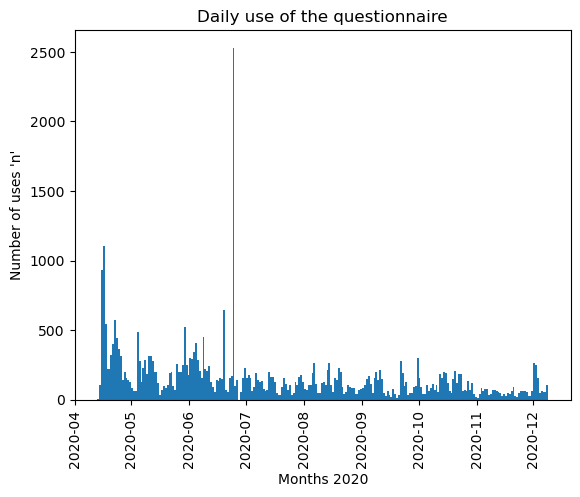

In [4]:
timedelta_df_1 = date_1.max() - date_1.min()

plt.figure()
plt.hist(date_1, bins=240)
plt.xlabel("Months 2020")
plt.ylabel("Number of uses 'n'")
plt.title("Daily use of the questionnaire")
plt.xticks(rotation = 90)
plt.show()

<center><b>General dispersion by symptom cluster</b></center>

|Measure | Anxiety | Stress | Avoidance | Distancing | Information seeking | Somatization |
| :-----: | :-----: |:-----: |:-----: | :-----: | :-----: |:-----: |
| Min     | 0.0     |  0.0   | 0.0    |  0.0    | 0.0     |  0.0   |
| Max     | 4.0     |  4.0    |  4.0   | 4.0     |  4.0    | 4.0    |
| Range   | 4.0     |  4.0   |  4.0   | 4.0     | 4.0     | 4.0    |
| 25th Percentile | 0.0  |  0.0  | 0.0  |  0.0 | 0.0  |  0.0 |
| 75th Percentile | 3.0  |  3.0  | 2.0 | 3.0 | 1.0 | 0.0 |
| Inter-quartile range | 3.0  |  3.0  | 3.0 | 1.0 | 0.0 | 0.0 |
| Variance | 2.6  | 2.3  |  1.8 | 2.5 | 1.2 | 1.3 |
| Standard deviation |  1.6 |  1.5  | 1.3 | 1.6 | 1.1 | 1.1 |

## Distribution of anxiety questions.

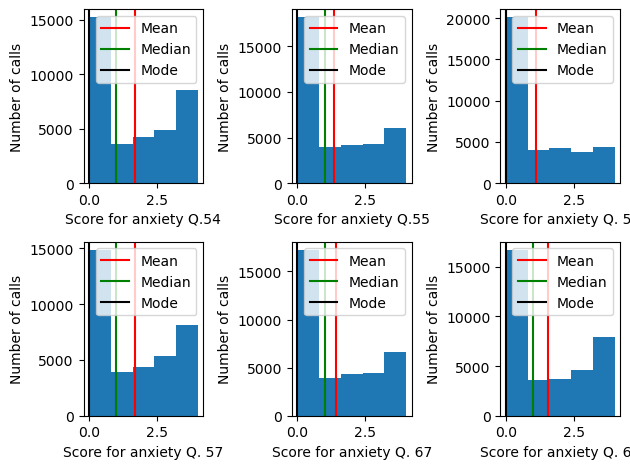

In [5]:
%run distribution_anx.py

## Distribution of stress questions.

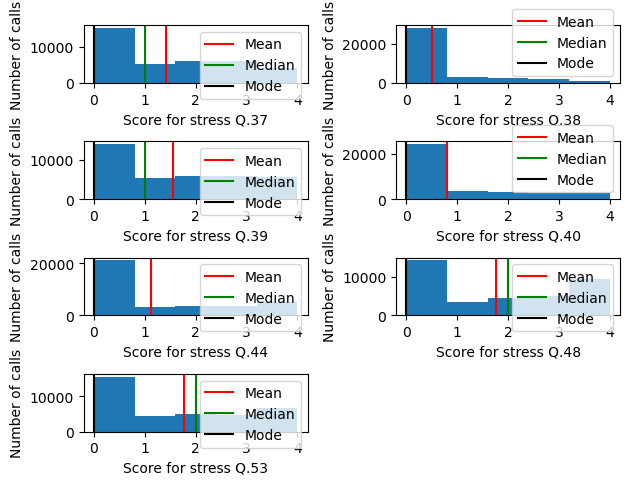

In [6]:
%run distribution_str.py

## Distribution of avoidance questions.

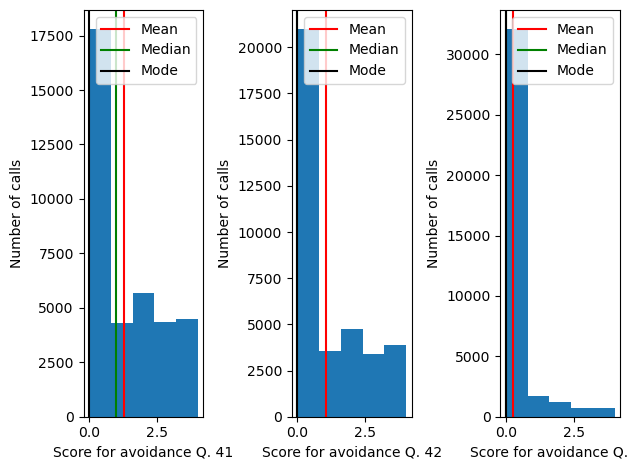

In [7]:
%run distribution_avo.py

## Distribution of distancing questions.

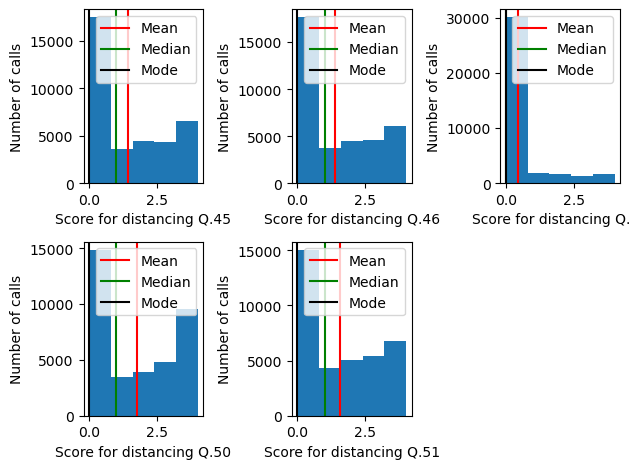

In [8]:
%run distribution_dis.py

## Distribution of information seeking and somatization questions.

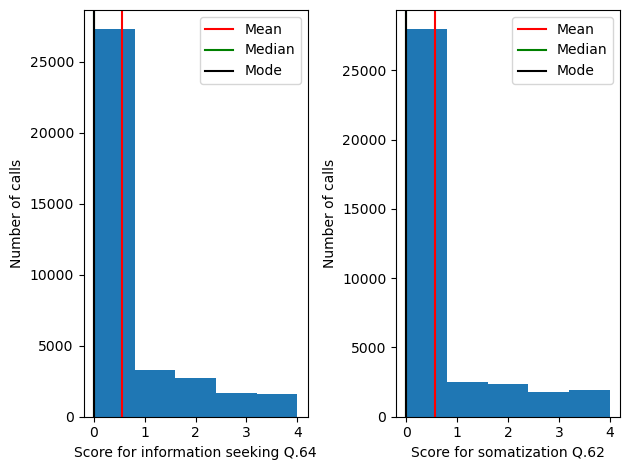

In [9]:
%run distribution_mix.py

# 5. Hypothesis testing. 
Several tests are performed to understand the changes in the behavior of the sample overal different time spans asociated with the defined events.

In [10]:
#The tests can be accesed through the next scripts, but are conveniently extracted on the following tables:
#%run anova_2_analysis.py
#%run analysis_n_uses.py
#%run contingency_analysis.py

## 5.1 One-way anova.
One-way anova tests were conducted on the symptom questions to compare if significance change happened between pre and post conditions for each selected event.

<center><b>One way anova analysis per event dates</b></center>

|Questions| Anouncement 1 F-oneway | Anouncement 1 P-value | Measures 1 F-oneway | Measures 1 P-value | Promotion 1 F-oneway| Promotion 1 P-value |Festivities 1 F-oneway| Festivities 1 P-value | Anouncement 2 F-oneway| Anouncement 2 P-value |Measures 2 F-oneway | Measures 2 P-value |Earthquake very strong 1 F-oneway | Earthquake very strong 1 P-value |Anouncement 3 F-oneway| Anouncement 3 P-value |Measures 2 F-oneway | Measures 2 P-value |Promotion 2 F-oneway| Promotion 2 P-value |Festivities 2 F-oneway| Festivities 2 P-value |Promotion 3 F-oneway| Promotion 3 P-value |Promotion 4 F-oneway| Promotion 4 P-value |
| :-----: | :-----: |:-----: | :-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |
|	Anxiety	Q.54	|	0.016	|	0.9	|	2.358	|	0.125	|	14.239	|	0	|	0.622	|	0.43	|	3.357	|	0.067	|	7.241e+00	|	7.000e-03	|	54.595	|	0	|	205.337	|	0	|		0.106	|	0.744	|	1.252	|	0.264	|	0.266	|	0.607	|	0.665	|	0.415	|	0.319	|	0.573	|
|	Anxiety	Q.55	|	0.297	|	0.586	|	6.897	|	0.009	|	1.0632e+01	|	1.0000e-03	|	2.011	|	0.156	|	0.933	|	0.334	|	2.733	|	0.098	|	38.368	|	0	|	139.719	|	0	|		0.167	|	0.683	|	0.095	|	0.757	|	0.907	|	0.342	|	3.864	|	0.05	|	0.228	|	0.633	|
|	Anxiety	Q.56	|	3.376	|	0.066	|	3.271	|	0.071	|	1.0456e+01	|	1.0000e-03	|	2.204	|	0.138	|	0.37	|	0.543	|	1.874	|	0.171	|	25.9	|	0	|	87.689	|	0	|		0.023	|	0.879	|	1.412	|	0.235	|	0.013	|	0.91	|	3.076	|	0.08	|	0.072	|	0.789	|
|	Anxiety	Q.57	|	1.67	|	0.196	|	6.488	|	0.011	|	14.348	|	0	|	0.531	|	0.466	|	0.583	|	0.445	|	1.1054e+01	|	1.0000e-03	|	59.566	|	0	|	195.112	|	0	|		0.526	|	0.468	|	0.041	|	0.84	|	0.258	|	0.612	|	2.991	|	0.084	|	0.342	|	0.559	|
|	Anxiety	Q.67	|	0.221	|	0.638	|	3.408	|	0.065	|	1.2029e+01	|	1.0000e-03	|	2.476	|	0.116	|	2.608	|	0.107	|	12.276	|	0	|	39.599	|	0	|	140.841	|	0	|		0.006	|	0.938	|	0.003	|	0.955	|	1.177	|	0.279	|	1.34	|	0.247	|	0.025	|	0.875	|
|	Anxiety	Q.68	|	0.177	|	0.674	|	9.336e+00	|	2.000e-03	|	9.765e+00	|	2.000e-03	|	1.491	|	0.222	|	3.332	|	0.068	|	1.1841e+01	|	1.0000e-03	|	56.714	|	0	|	158.236	|	0	|		0.172	|	0.678	|	0.006	|	0.94	|	1.461	|	0.228	|	3.883	|	0.049	|	0.033	|	0.857	|
|	Stress	Q.37	|	1.229	|	0.268	|	2.543	|	0.111	|	4.606	|	0.032	|	1.192	|	0.275	|	3.325	|	0.068	|	12.735	|	0	|	6.182	|	0.013	|	60.151	|	0	|		0.018	|	0.894	|	1.054	|	0.305	|	1.717	|	0.191	|	8.258e+00	|	4.000e-03	|	0.483	|	0.488	|
|	Stress	Q.38	|	0.73	|	0.393	|	4.026	|	0.045	|	0.019	|	0.889	|	0.174	|	0.677	|	0.516	|	0.473	|	0.426	|	0.514	|	0.255	|	0.614	|	0.716	|	0.397	|		5.174	|	0.023	|	0.053	|	0.817	|	0.024	|	0.877	|	0.74	|	0.39	|	0.011	|	0.917	|
|	Stress	Q.39	|	5.101	|	0.024	|	0.001	|	0.979	|	4.174	|	0.041	|	0.452	|	0.501	|	8.617e+00	|	3.000e-03	|	9.351e+00	|	2.000e-03	|	29.824	|	0	|	107.178	|	0	|		0.	|	0.987	|	0.121	|	0.728	|	0.116	|	0.733	|	3.991	|	0.046	|	0.068	|	0.794	|
|	Stress	Q.40	|	0.296	|	0.586	|	2.375	|	0.123	|	0.243	|	0.622	|	5.86	|	0.016	|	4.797	|	0.029	|	3.848	|	0.05	|	3.277	|	0.07	|	41.865	|	0	|		0.554	|	0.457	|	1.757	|	0.186	|	1.172	|	0.28	|	1.331	|	0.249	|	2.357	|	0.126	|
|	Stress	Q.44	|	2.678	|	0.102	|	0.001	|	0.97	|	2.955	|	0.086	|	1.993	|	0.158	|	3.63	|	0.057	|	1.062	|	0.303	|	6.812	|	0.009	|	43.788	|	0	|		0.359	|	0.549	|	1.016	|	0.314	|	1.552	|	0.214	|	2.674	|	0.102	|	0.857	|	0.355	|
|	Stress	Q.48	|	1.04	|	0.308	|	1.465	|	0.226	|	9.03e+00	|	3.00e-03	|	3.602	|	0.058	|	6.823	|	0.009	|	7.433e+00	|	6.000e-03	|	43.939	|	0	|	138.136	|	0	|		0.029	|	0.865	|	0.493	|	0.483	|	0.015	|	0.904	|	1.169	|	0.28	|	0.202	|	0.653	|
|	Stress	Q.53	|	4.913	|	0.027	|	0.459	|	0.498	|	4.232	|	0.04	|	1.137	|	0.286	|	4.72	|	0.03	|	9.037e+00	|	3.000e-03	|	16.951	|	0	|	92.875	|	0	|		1.037	|	0.309	|	0.444	|	0.506	|	1.108	|	0.294	|	2.752	|	0.098	|	1.425	|	0.234	|
|	Avoidance	Q.41	|	0.143	|	0.706	|	0.008	|	0.927	|	3.076	|	0.08	|	4.109	|	0.043	|	0.197	|	0.657	|	8.445e+00	|	4.000e-03	|	4.561	|	0.033	|	52.102	|	0	|		0.006	|	0.94	|	0.003	|	0.955	|	0.109	|	0.741	|	0.036	|	0.85	|	0.057	|	0.812	|
|	Avoidance	Q.42	|	0.813	|	0.367	|	0.005	|	0.941	|	0.069	|	0.793	|	8.406e+00	|	4.000e-03	|	0.219	|	0.64	|	0.353	|	0.552	|	1.863	|	0.172	|	8.854e+00	|	3.000e-03	|		0.153	|	0.696	|	0.013	|	0.91	|	0.669	|	0.414	|	3.18	|	0.075	|	1.834	|	0.177	|
|	Avoidance	Q.43	|	0.065	|	0.799	|	2.973	|	0.085	|	1.788	|	0.181	|	1.325	|	0.25	|	1.942	|	0.164	|	3.311	|	0.069	|	1.0139e+01	|	1.0000e-03	|	6.064	|	0.014	|		6.035	|	0.014	|	0.001	|	0.982	|	0.093	|	0.761	|	0.209	|	0.648	|	0.	|	0.988	|
|	Distancing	Q.45	|	0.071	|	0.789	|	6.938	|	0.009	|	7.1	|	0.008	|	2.019	|	0.156	|	0.777	|	0.378	|	1.771	|	0.183	|	30.25	|	0	|	69.392	|	0	|		1.824	|	0.177	|	0.229	|	0.632	|	0.003	|	0.955	|	0.926	|	0.336	|	0.018	|	0.893	|
|	Distancing	Q.46	|	1.371	|	0.242	|	3.156	|	0.076	|	4.517	|	0.034	|	3.412	|	0.065	|	1.796	|	0.18	|	1.333	|	0.248	|	4.403	|	0.036	|	26.831	|	0	|		3.151	|	0.076	|	0.381	|	0.537	|	0.002	|	0.968	|	1.267	|	0.261	|	0.091	|	0.764	|
|	Distancing	Q.49	|	5.007	|	0.025	|	6.239	|	0.013	|	3.882	|	0.049	|	1.299	|	0.255	|	0.05	|	0.824	|	0.014	|	0.908	|	6.745	|	0.009	|	24.47	|	0	|		0.	|	0.987	|	0.781	|	0.377	|	0.903	|	0.343	|	0.194	|	0.66	|	0.111	|	0.739	|
|	Distancing	Q.50	|	0.982	|	0.322	|	5.072	|	0.024	|	16.258	|	0	|	0.611	|	0.435	|	5.903	|	0.015	|	1.1782e+01	|	1.0000e-03	|	47.528	|	0	|	204.843	|	0	|		2.714	|	0.1	|	0.368	|	0.544	|	0.353	|	0.553	|	0.784	|	0.376	|	1.277	|	0.259	|
|	Distancing	Q.51	|	0.613	|	0.434	|	5.558	|	0.018	|	25.666	|	0	|	2.846	|	0.092	|	2.187	|	0.139	|	12.681	|	0	|	60.228	|	0	|	145.868	|	0	|		0.029	|	0.865	|	2.012	|	0.157	|	0.	|	0.988	|	5.543	|	0.019	|	0.037	|	0.847	|
|	Information seeking	Q.64	|	1.895	|	0.169	|	0.111	|	0.739	|	0.812	|	0.368	|	0.199	|	0.655	|	0.687	|	0.407	|	1.912	|	0.167	|	0.009	|	0.926	|	6.67	|	0.01	|		3.227	|	0.073	|	0.89	|	0.346	|	1.58	|	0.21	|	5.989	|	0.015	|	0.001	|	0.975	|
|	Somatization	Q.62	|	2.221	|	0.136	|	0.071	|	0.79	|	0.229	|	0.633	|	0.187	|	0.665	|	0.038	|	0.845	|	1.528	|	0.216	|	0.007	|	0.933	|	23.386	|	0	|		2.944	|	0.086	|	0.168	|	0.682	|	0.68	|	0.41	|	0.531	|	0.467	|	3.163	|	0.076	|


## 5.2 Contingency analysis per event.
The contingency analysis tests were conducted on the symptom questions to evaluate if significant change in the distribution of the responses was present for any of the selected events, not finding statistical significance for the cases evaluated.

## 5.3 Percentual change of number of uses of the questionnaire per event.

Two evaluations of the percentual change comparing the number of uses of the questionnaire on pre and post time windows performed for all events highlights the cases in which the event triggered more mental health needs. The first method compares, the mean of the -72 hours vs. the mean of the +72 hours, while method 2 compares the mean of the -72 hours vs. the daily maximum (n) found in the +72 hours time range. The second method allows us to see the day in which mayor change is found as well as a clearer way to identify possible complicated days after the event.

<center><b>Percentual change comparing the acumulated number of pre and post uses per events</b></center>

|Events             | -72 hours window (n)| Event day +72 hours window (n) |-72 hours daily mean|Period Maximum day (n)  | Percentual change between means -72 hours / +72 hours(%) | Percentual change between mean of the -72 hours / Max day (n) in the +72 hours window | Time | 
| :-----:           | :-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |
|	Announcement 1	|	1041	|	986	|347|542	|-5.283	| 56.196 | 24 hours |
|	Announcement 2	|	909	|	349	|303|	195|-61.606	| -35.644 | 24 hours |
|	Announcement 3	|	2767	|	587	|922.333|157 |	-78.786	| -82.978 | 72 hours |
|	Announcement  general	|	4717	|	1922	|Does not apply|Does not apply|	-59.254	| 13.385 | Does not apply | 
|	Measures 1	|	768	|	1370	|569|256|	78.385	| 12.226 | 24 hours |
|	Measures 2	|	1251	|	1038	|417 |409|	-17.026	| -1.918 | 72 hours |
|	Measures 3	|	587	|	395	|195.667|175|	-32.709	| -10.562 | 24 hours |
|	Measures general	|	2606	|	2803	|Does not apply|Does not apply|	7.559	| 45.319 |  Does not apply |
|	Promotion 1	|	1116	|	497	|372|198|	-55.466	| -46.774 | 24 hours |
|	Promotion 2	|	183	|	445	|61|176|	143.169	| 188.525 | 72 hours |
|	Promotion 3	|	134	|	569	|44.667|279|	324.627	| 524.622 | 24 hours |
|	Promotion 4	|	175	|	108	|58.333|55|	-38.286	|5.714 | 24 hours |
|	Promotion general	|	1608	|	1619	|Does not apply|Does not apply|	0.684	| 36.706 | Does not apply |
|	Festivities 1	|	694	|	790	|231.333|317|	13.833	| 37.032 | 24 hours |
|	Festivities 2	|	115	|	134	|38.33|76|	16.522	| 98.263 | 24 hours |
|	Festivities general	|	809	|	924	|Does not apply|Does not apply|	14.215	| 37.032 | Does not apply |
|	Earthquake very strong	|	276	|	2767	|92|2531|	902.536	| 2651.087 | 24 hours |


# 6. Dimensionality analysis

## 6.1 Principal component analysis

The PCA analysis suggest that the "anxiety dimension" in its first component explains half of the variance of the data sample (more than 50%).

While a more regularly distribution happens between the rest of the 22 components.

This means that anxiety is mostly related with the changes in symptom behaviors.

In [14]:
%run pca_analysis.py

PCA(n_components=23)

[[ 2.86115220e-01  2.66454023e-01  2.26546612e-01  2.79728471e-01
   2.49431279e-01  2.73331209e-01  1.96840741e-01  1.15876742e-01
   2.16218331e-01  1.72316121e-01  1.88132523e-01  2.56436175e-01
   2.33458026e-01  1.60236069e-01  1.20780860e-01  3.96631671e-02
   2.45157826e-01  2.18320942e-01  1.02282146e-01  2.42572217e-01
   2.41410243e-01  1.18114027e-01  7.23477673e-02]
 [-6.49199001e-02 -1.32410246e-01 -1.20116027e-01 -1.69779299e-01
  -2.91887686e-01 -2.78204636e-01  3.12143423e-01  1.43059644e-01
   3.54422610e-01  2.49145333e-01  2.36943794e-01  8.07713220e-02
   3.52172580e-01  2.63680699e-01  2.55832493e-01  5.25230099e-02
  -1.88049835e-01 -8.37855090e-02 -1.41047881e-01 -1.50294830e-01
  -1.94418913e-01  1.09494330e-01  8.79409421e-02]
 [-1.09610714e-01 -6.86658469e-02 -6.51318181e-02 -7.64786146e-02
   9.33808840e-02  1.78362480e-02 -2.19447233e-01 -7.31054192e-02
  -1.32463505e-01 -1.11983141e-01 -1.13251207e-01 -7.85345548e-03
  -1.83478804e-01 

# Preprocessing

## Scaling and mapping

Four strategies were followed to evaluate the machine learning efficiency considering the possible effects of the outliers. The mapping was performed using the quantile transformer algorithm for all strategies: 
- 1. Maintaining the data without transformations. 
- 2. Normalizing the data
- 3. Scaling using the standard scaling algorithm.
- 4. Scaling using the robust scaling algorithm. 


features_scaled_standard
[[ 0.19947609  0.42097784  0.59688589 ...  0.27132945  1.26595201
   1.32072175]
 [-1.01119225 -0.8607332  -0.77398266 ... -1.00154922 -0.48668331
  -0.50373106]
 [-1.01119225 -0.8607332  -0.77398266 ... -1.00154922  1.26595201
  -0.50373106]
 ...
 [-1.01119225 -0.21987768 -0.08854839 ... -0.36510988 -0.48668331
  -0.50373106]
 [ 1.41014444  1.06183336 -0.77398266 ...  0.90776879 -0.48668331
  -0.50373106]
 [-1.01119225 -0.8607332  -0.77398266 ...  0.27132945 -0.48668331
  -0.50373106]]
features_scaled_robust
[[ 0.33333333  0.33333333  1.         ...  0.33333333  2.
   2.        ]
 [-0.33333333 -0.33333333  0.         ... -0.33333333  0.
   0.        ]
 [-0.33333333 -0.33333333  0.         ... -0.33333333  2.
   0.        ]
 ...
 [-0.33333333  0.          0.5        ...  0.          0.
   0.        ]
 [ 1.          0.66666667  0.         ...  0.66666667  0.
   0.        ]
 [-0.33333333 -0.33333333  0.         ...  0.33333333  0.
   0.        ]]
Mapping the feat

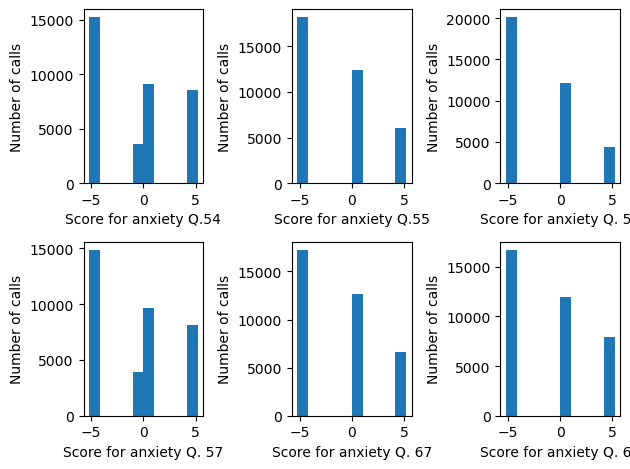

Mapping the features using quantile mapping and robust scaling
[[ 0.17910169  0.43348197  0.56868553 ...  0.24713363  1.11636889
   1.1473155 ]
 [-5.19933758 -5.19933758 -5.19933758 ... -5.19933758 -5.19933758
  -5.19933758]
 [-5.19933758 -5.19933758 -5.19933758 ... -5.19933758  1.11636889
  -5.19933758]
 ...
 [-5.19933758  0.1397103   0.26008943 ... -0.07534535 -5.19933758
  -5.19933758]
 [ 5.19933758  0.79188381 -5.19933758 ...  0.64408623 -5.19933758
  -5.19933758]
 [-5.19933758 -5.19933758 -5.19933758 ...  0.24713363 -5.19933758
  -5.19933758]]
Evaluating distributions after robust scaling and quantile mapping


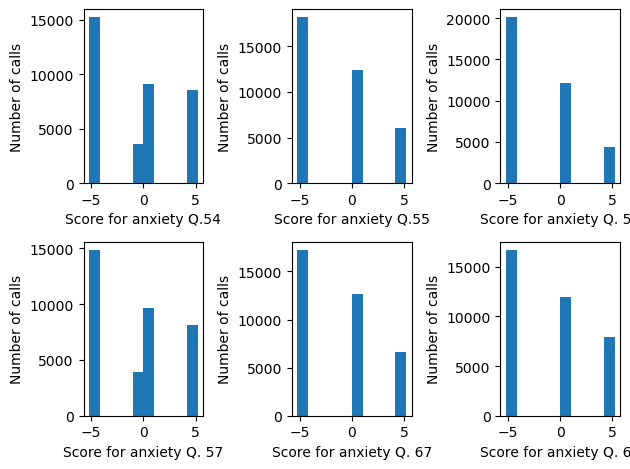

In [12]:
%run preprocessing_opt.py

# 7. Machine learning 

Classification rate (training_raw) = 0.9674040490893457
Classification rate (test_raw)     = 0.9666241108881999


C:\Users\ro_ga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Overall classification rate: 0.9636788254605143


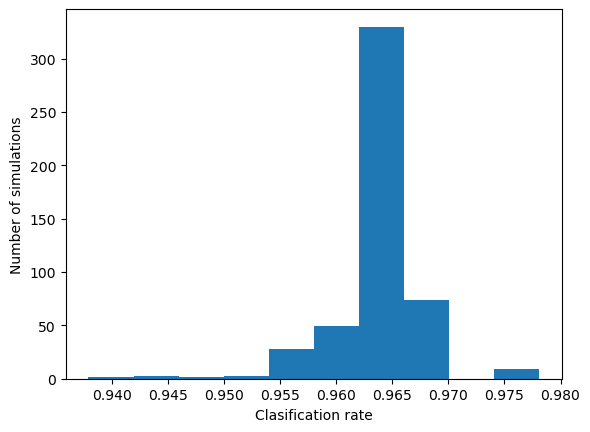

Classification rate (training_nor) = 0.9539201125615571
Classification rate (test_nor)     = 0.9520335582710195


C:\Users\ro_ga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Overall classification rate: 0.7394005106693416


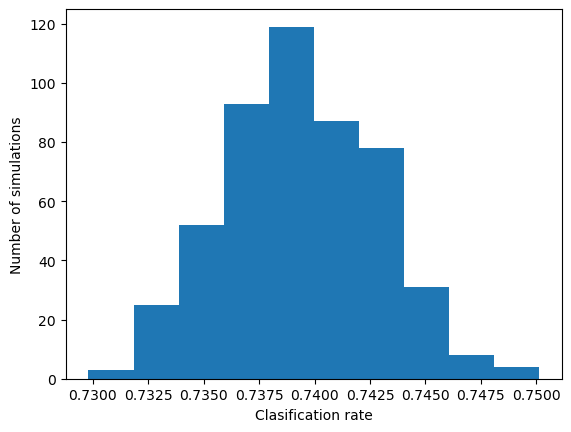

Classification rate (training_standard) = 0.9433674665832877
Classification rate (test_standard)     = 0.9424585081159949


C:\Users\ro_ga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ro_ga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ro_ga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Overall classification rate: 0.9407207732992887


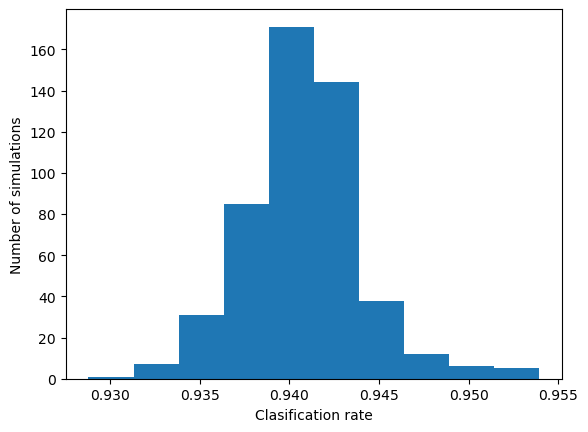

Classification rate (training_robust) = 0.9425467052294223
Classification rate (test_robust)     = 0.9430968447929965


C:\Users\ro_ga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ro_ga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Overall classification rate: 0.9404926135327375


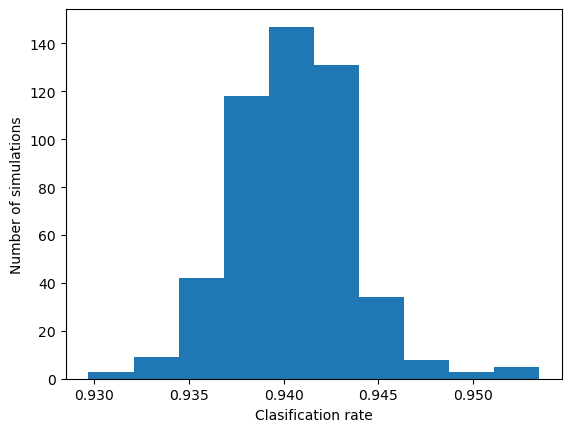

In [13]:
#%run mlp_analysis.py

## Classification rate results
The better fitting came from the strategy without scaling or normalization. It is possible that the original data with whole integers between 0 and 4 is well suitted for MLP machine learning.

<center><b>Comparison of the classification rates of the different strategies</b></center>

| Strategy | Classification rate mean from 500 iterations on random samples using MLP algorithm with 10,000 iterations of the neural network|
|:--:|:--:|
| Maintaining the data without transformations | 0.963|
| Normalizing the data | 0.739 |
| Scaling using the standard scaling algorithm | 0.941 |
| Scaling using the robust scaling algorithm | 0.940 |
